In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("RdBu", n_colors=8, desat=1.))
sns.set_style("white")
sns.set_style({'grid.color': '0.95'})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
## PARAMETERS

U = 16
BETA = 20
MU = 15
NA = 2
NY = 5

## DEFINES

NORB = 3
NK = 512
abs_t0 = 0.184

simDir = "../data/bissect_kspace/NA" + str(NA) + "-NY" + str(NY) + "/U" + str(U) +\
                 "-BETA" + str(BETA) +\
                 "-MU" + str(MU)

filling = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[4, 1]
final_gp = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[5, 1]
it = int(np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[6, 1])
#TBbands = np.loadtxt(simDir + "/free-bands.csv")
nUp = np.loadtxt(simDir + "/nUp.csv", delimiter = ',')
nDw = np.loadtxt(simDir + "/nDw.csv", delimiter = ',')
bandsUp = np.loadtxt(simDir +"/bandsUp.csv")
bandsDw = np.loadtxt(simDir +"/bandsDw.csv")
#grand_potential = np.loadtxt(simDir +"/grand_potential_evol.csv")

In [4]:
filling

0.73333300000000001

In [5]:
final_gp

-4.9873599999999998

-0.9092481915 0.9092481915
1.05437938198 -1.05437938198


[]

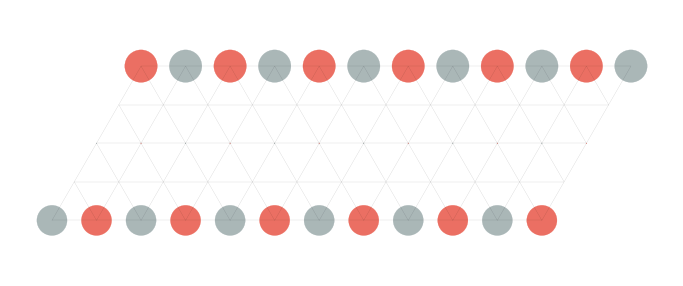

In [8]:
NX=12
dotscale = 1000
fig = plt.figure(1, figsize = (NX, NY))
ax = fig.add_subplot(111)
for i in range(NX - NY + 1):
    ax.plot([i, ( NY - 1 ) * 0.5 + i],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NY - 1 + i , ( NY - 1 ) * 0.5 + i],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
for i in range(1, NY - 1):
    ax.plot([NY - 1 - i , ( NY - 1 - i ) * 0.5],\
    [0, ( NY - 1 - i ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + 0.5 + 0.5 * i,\
    NX - 0.5 * (NY - 1) + i],\
    [np.sqrt(3) / 2 * (1 + i), np.sqrt(3) / 2 * (NY - 1)],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([i + NX - NY + 1,\
    ( NY - 1 ) * 0.5 + i + NX - NY + 1],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + i / 2, i / 2],\
    [i * np.sqrt(3) / 2, i * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1 + 0.5, NX - 0.5 * (NY - 1)],\
[np.sqrt(3) / 2, np.sqrt(3) / 2 * (NY - 1)],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - NY + 1,\
( NY - 1 ) * 0.5 + NX - NY + 1],\
[0, ( NY - 1 ) * np.sqrt(3) / 2],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1, 0], [0, 0],\
        linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1 + (NY - 1) / 2, ( NY - 1 ) / 2],\
[( NY - 1 ) * np.sqrt(3) / 2, ( NY - 1 ) * np.sqrt(3) / 2],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)

clr = np.chararray((NX * NY), itemsize = 10)
a1 = np.arange(NX)
a2 = np.arange(NY)
lat = np.zeros((NX * NY))
vs = np.zeros((NX * NY , 2))
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(NX):
    for j in range(NY):
        vs[NX * j + i, :] =\
        a1[i] * v1 + a2[j] * v2
        a = (i + NA) % NA
        lat[NX * j + i] \
        = ( nUp[NORB * (NY * a + j)]\
        + nUp[1 + NORB * (NY * a + j)]\
        + nUp[2 + NORB * (NY * a + j)]\
        - nDw[NORB * (NY * a + j)]\
        - nDw[1 + NORB * (NY * a + j)]\
        - nDw[2 + NORB * (NY * a + j)])
        if lat[NX * j + i] > 0:
            clr[NX * j + i] = "#e74c3c"
        else:
            clr[NX * j + i] = "#95a5a6"
print(lat[0], lat[1])
print(lat[NX* (NY - 1)], lat[NX* (NY - 1) + 1])

ax.axis('off')
ax.scatter(vs[:, 0], vs[:, 1],\
s = dotscale * abs(lat),\
c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax.axis('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])

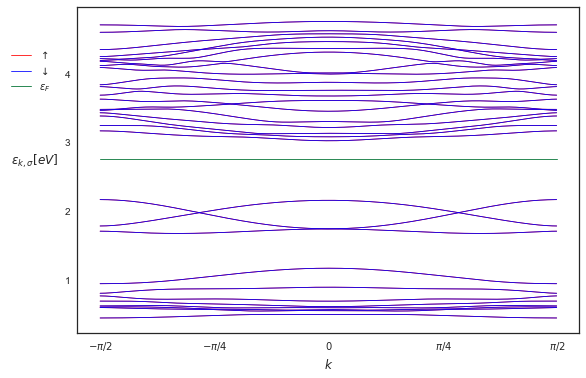

In [9]:
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot(111)
ks = np.linspace(-np.pi / NA, np.pi / NA, num=NK,\
        endpoint=False)
ax.plot(ks, bandsUp, markersize=2,\
linewidth = 0.8, c = 'r', linestyle = '-', label = r'$\uparrow$')
ax.plot(ks, bandsDw, markersize=2,\
linewidth = 0.8, c = 'b', linestyle = '-', label = r'$\downarrow$')
ax.plot(ks, abs_t0*np.ones(NK)*MU,\
c = 'seagreen', linewidth = 1, label = r'$\varepsilon_F$')
ax.set_xlabel(r'$k$', fontsize = 12)
ax.set_ylabel(r'$\varepsilon_{k, \sigma} [eV]$', rotation = 0,\
fontsize = 12, labelpad = 30)
ax.set_xticks([-np.pi / NA, - np.pi / NA / 2, 0,\
np.pi / NA / 2, np.pi / NA])
ax.set_xticklabels([r'$-\pi / ' + str(NA) + '$', r'$-\pi / ' + str(NA * 2) + '$',\
                        r'$0$', r'$\pi / ' + str(NA * 2) + '$', r'$\pi / ' + str(NA) + '$'])
ax.legend(bbox_to_anchor=(-0.035,0.9))